This notebook summarizes the major steps implemented in this project.  For a more detailed look please view the other notebooks in this repository.  

I have two goals in this project.  The first was to use NLP to predict a good or bad comment on reddit. The second goal is to see whether I can use Latent Dirichlet Allocation topic modelling to create features that will enhance an NLP model.

Reddit user u'Stuck in the matrix has archived every reddit comment beginning in 2015 and made them publicly available.  Alternatively, one could use the reddit API and collect data but there are limitations on how much you can collect at a time.  There is even a python specific wrapper created for the reddit API.  PRAW is a well known tool used to access reddit.

I downloaded one full month of reddit data (5/2017) from https://files.pushshift.io/reddit/. One month of reddit comments should provide sufficient data for this project. 


I want to open one record and load it just to see what the JSON and loaded version looks like

How many total records are in the file we downloaded?

In [6]:
#total records in 5/2017 comment file
archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    for count, record in enumerate(f):
        pass
    print(count)

79810359


79.8M comments! That seems like a good amount of data to work with.

Let's take a look at some of the subreddits and their number of comments.


This month the most active subreddits were AskReddit with 5 million comments and politics with 2 million comments.

Now I'm hoping this is working. Let's see if we can specify a subreddit and look at one record. 

The comments in the file are stored in JSON format.  To process the file, I will use a 2d array. First I initialize an empty list, open the file and initialize another empty list.  As I read each line, if the comment is from the soccer subreddit (or subreddit of your choice) then unpack the JSON string into a list. These lists are appended to each other as well as the first list.  loop through each  I am going to loop through and
To arrange the data in the format I want, I created empty arrays for each field in the JSON file and then loaded the file into a 2D-Array.

I ran for one subreddit (I picked soccer because I enjoy soccer) but we can load all of the subreddits into a list
and then loop through the list to load all subreddits into a dataframe.

In [21]:
#step 1
pd.set_option('display.max_columns',None)#b/c i want to see all columns
import pandas as pd
import json
import bz2 

#archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
archive= 'C:\\users\Augustine\Documents\\reddit\RC_2017-05.bz2'
line_all= []
with bz2.open(archive,'rt') as f:
    my_row= []
    for comment in f:
        if json.loads(comment)['subreddit']=='soccer':
            comment= json.loads(comment) 
            my_row.append(comment)
    line_all.append(my_row)
    #for comment in f:
        #if json.loads(comment)['subreddit']=='technology':
        #line= json.loads(comment)
    #line_all += comment.values()
    #line_all= line_all.append(comment)


Now I'm going to create lists for each field in the JSON string.  In the next step I will create a dataframe from the lists.

In [24]:
#step 2
author=[]
author_flair_css_class= []
author_flair_text= []
body= []
can_gild= []
controversiality= []
created_utc= []
distinguished= []
edited= []
gilded= []
id= []
link_id= []
parent_id= []
retrieved_on= []
score= []
stickied= []
subreddit= []
subreddit_id= []


for i in range(0, len(line_all[0])):
    author.append(line_all[0][i]['author'])
    author_flair_css_class.append(line_all[0][i]['author_flair_css_class'])
    author_flair_text.append(line_all[0][i]['author_flair_text'])
    body.append(line_all[0][i]['body'])
    can_gild.append(line_all[0][i]['can_gild'])
    controversiality.append(line_all[0][i]['controversiality'])
    created_utc.append(line_all[0][i]['created_utc'])
    distinguished.append(line_all[0][i]['distinguished'])
    edited.append(line_all[0][i]['edited'])
    gilded.append(line_all[0][i]['gilded'])
    id.append(line_all[0][i]['id'])
    link_id.append(line_all[0][i]['link_id'])
    parent_id.append(line_all[0][i]['parent_id'])
    retrieved_on.append(line_all[0][i]['retrieved_on'])
    score.append(line_all[0][i]['score'])
    stickied.append(line_all[0][i]['stickied'])
    subreddit.append(line_all[0][i]['subreddit'])
    subreddit_id.append(line_all[0][i]['subreddit_id'])

    

I want to check the lenght of my subreddit list

In [25]:
#step 3 check the length matches earlier
#line_all[1][]['line']['body']
len(line_all[0])

572163

Finally, load the lists as a dataframe.

In [69]:
#step 4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

subr_df= DataFrame({'author':author,
                   'author_flair_css_class':author_flair_css_class,
                   'author_flair_text':author_flair_text,
                   'body':body,
                   'can_gild':can_gild,
                   'controversiality':controversiality,
                   'created_utc':created_utc,
                   'distinguished':distinguished,
                   'edited':edited,
                   'gilded':gilded,
                   'id':id,
                   'link_id':link_id,
                   'parent_id':parent_id,
                   'retrieved_on':retrieved_on,
                   'score':score,
                   'stickied':stickied,
                   'subreddit':subreddit,
                   'subreddit_id':subreddit_id})

subr_df= subr_df[['author', 'author_flair_css_class','author_flair_text','body','can_gild','controversiality',
                   'created_utc','distinguished','edited','gilded','id','link_id','parent_id','retrieved_on',
                   'score','stickied','subreddit','subreddit_id']]

One thing I'll do for easier processing is convert the field create_utc to a python datetime datatype.

In [99]:
from datetime import datetime
subr_df['created_datetime'] = subr_df.created_utc.apply(datetime.utcfromtimestamp)
subr_df['created_year'] = subr_df.created_datetime.dt.year
subr_df['created_month'] = subr_df.created_datetime.dt.month
subr_df['created_day'] = subr_df.created_datetime.dt.day
subr_df['created_hour'] = subr_df.created_datetime.dt.hour


In [100]:
subr_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,score,stickied,subreddit,subreddit_id,created_datetime,hour,created_hour,created_day,created_year,created_month
0,iEatPorcupines,None,None,"After seeing [this,](https://my.mixtape.moe/ro...",True,0,1493596800,None,False,0,...,2,False,soccer,t5_2qi58,2017-05-01 00:00:00,0,0,1,2017,5
1,Thesolly180,s1 3 team-3 country-eng,Liverpool,"Didn't say I'd never heard of it, where did I ...",True,0,1493596818,None,False,0,...,0,False,soccer,t5_2qi58,2017-05-01 00:00:18,0,0,1,2017,5
2,ntdxc1878,s1 15 team-15 country-eng,Everton,What's the context?,True,0,1493596822,None,False,0,...,2,False,soccer,t5_2qi58,2017-05-01 00:00:22,0,0,1,2017,5
3,iEatPorcupines,None,None,Just show him [this.](https://my.mixtape.moe/r...,True,0,1493596823,None,False,0,...,1,False,soccer,t5_2qi58,2017-05-01 00:00:23,0,0,1,2017,5
4,[deleted],None,None,[deleted],True,0,1493596826,None,False,0,...,-32,False,soccer,t5_2qi58,2017-05-01 00:00:26,0,0,1,2017,5


Inspecting some of the fields, it looks like some comments have been deleted. I'll end up dropping those comments from the data set.

In [31]:
subr_df['author'].notnull().sum()

572163

In [46]:
subr_df['author'].describe()

count        572163
unique        44846
top       [deleted]
freq          37745
Name: author, dtype: object

In [47]:
subr_df['score'].describe()

count    572163.000000
mean         13.210465
std          69.942649
min        -610.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10818.000000
Name: score, dtype: float64

In [48]:
subr_df['body'].describe()

count        572163
unique       519994
top       [deleted]
freq          31760
Name: body, dtype: object

In [91]:
#create an 'hour' feature so we can graph posts by hour of day
subr_df['hour']=subr_df.created_datetime.dt.hour

In [101]:
#count comments during the month by time
time_counts=subr_df.created_datetime.value_counts()
time_countsDf=time_counts.to_frame()
#time_countsDf.rename(columns=)
time_countsDf.rename(columns={'time':'comments'},inplace=True)

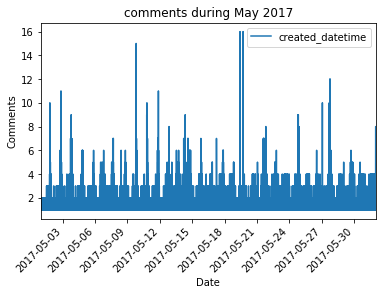

In [102]:
#now graph the number of comments during the month by time

#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

time_countsDf.plot(kind='line',title= 'comments during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


Let's look at comments by day/ time in a couple of different ways.
First let's group comments into day of the month

In [103]:

day_counts=subr_df.created_day.value_counts().sort_index()
day_countsDf= day_counts.to_frame()
day_countsDf.rename(columns={'time':'comments'},inplace=True)


In [104]:
day_countsDf

,created_day
1,14886
2,20602
3,20739
4,15555
5,15136
6,18687
7,21655
8,13829
9,18339
10,19783


In [ ]:
#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

day_countsDf.plot(kind='line',title= 'comments by day during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


Next look at hour of the day.  Earlier we created an hour feature based on our 'created_datetime' field.

In [107]:
#count comments by hour(1-24) of the day
hour_counts=subr_df.hour.value_counts().sort_index()
unique_hours=subr_df.hour.unique()
hour_countsDf= hour_counts.to_frame()
#unique_hoursDf= unique_hours.to_frame()
hour_countsDf.rename(columns={'hour':'comments'},inplace=True)
#print(hour_counts)
#print(unique_hours)

In [108]:
hour_counts

0     12957
1     10412
2      8534
3      7095
4      6278
5      6055
6      7028
7      8706
8     10494
9     12839
10    14966
11    19551
12    26164
13    29866
14    35742
15    37758
16    39300
17    36471
18    43573
19    59062
20    61083
21    37238
22    23717
23    17274
Name: hour, dtype: int64

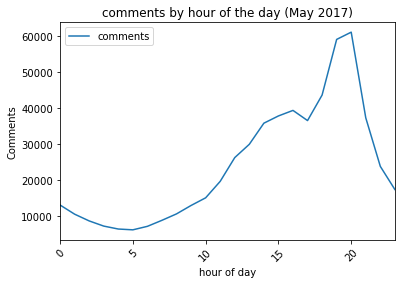

In [109]:
#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

hour_countsDf.plot(kind='line',title= 'comments by hour of the day (May 2017)')
plt.xticks(rotation=45)
plt.xlabel('hour of day')
plt.ylabel('Comments')
plt.show()


It looks like comment volume peaks at hour 20 or 8 pm.  

I just want to use parent level comments.  Parent level comments should have t3 in the 'parent_id' field.
I'm going to use a simple regular expression to subset the dataframe so I just have parent level comments.

Building a commnet tree requires parsing up the parent_id field until your reach a parent_id beginning with 't3'.

In [138]:
import re 
par_subr_df=subr_df[subr_df.parent_id.str.contains('t3_',regex=True)]


As we saw earlier, some comments have been deleted and I also want to drop these.

In [152]:
#remove obeservations where the body/comment was deleted
del_par_subr_df= par_subr_df.loc[(par_subr_df['body']!='[deleted]')]

In [133]:
pd.set_option('display.max_columns',None)
print(subr_df[:1])

        author author_flair_css_class author_flair_text  \
58790  RCFProd                   None              None   

                                                    body can_gild  \
58790  I just read this comment 5 months later and ne...     True   

       controversiality  created_utc distinguished edited  gilded       id  \
58790                 0   1493889914          None  False       0  dh44knl   

         link_id   parent_id  retrieved_on  score stickied subreddit  \
58790  t3_5cadem  t1_d9v92m8    1496247396      1    False    soccer   

      subreddit_id    created_datetime  hour  created_hour  created_day  \
58790     t5_2qi58 2017-05-04 09:25:14     9             9            4   

       created_year  created_month  
58790          2017              5  


In [154]:
del_par_subr_df['score'].describe()

count    155254.000000
mean         19.221482
std         110.013798
min        -220.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10818.000000
Name: score, dtype: float64

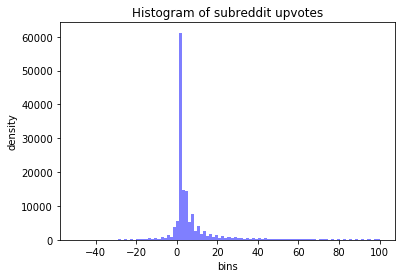

In [301]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = del_par_subr_df['score']
num_bins = 100
n, bins, patches = plt.hist(x,num_bins, range=[-50,100], facecolor='blue', alpha=0.5)
plt.title('Histogram of subreddit upvotes')
plt.ylabel('density')
plt.xlabel('bins')
plt.show()

In [169]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]       

In [182]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

C:\Users\Augustine\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [186]:
#split data set into train and test 
from sklearn.model_selection import train_test_split 

#split dataStg into train/ test
train, test= train_test_split(del_par_subr_df,test_size=.2)

# recreate index in test and train sets so we can run through the text processing function
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


In [225]:
#clean text
#define function to process raw text one record at a time
from bs4 import BeautifulSoup
import re 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.stem import PorterStemmer 
ps= PorterStemmer()
from nltk.corpus import stopwords 
from nltk import clean_html

def processText(raw):
#remove tags
#    text= clean_html(raw)
    text = BeautifulSoup(raw,'lxml')

#remove numbers so we only have text    
    letters= re.sub("[^a-zA-Z]"," ",text.get_text())
#remove url patterns    
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    lettersOnly = re.sub(url_pattern, ' ', letters)
#change everything to lower case and split 
    lowers= lettersOnly.lower()
#stem lower case letters
    lems= wordnet_lemmatizer.lemmatize(lowers).split()
#remove common words using nltk dictionary
    stopWords= set(stopwords.words('english'))
    procdText= [j for j in lems if not j in stopWords]
#mash everything back together     
    return procdText
    #return( " ".join(procdText))

In [226]:
#loop through train data and process text
#get number of rows
numRows= train["body"].size
print(numRows)
#init empty list
cleanText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    cleanText.append(processText(train["body"][i]))

124203


C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://pbs.twimg.com/profile_images/448878478780530688/oJs-L-nZ.jpeg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://www.reddit.com/r/soccer/comments/6dv4yp/be%C5%9Fikta%C5%9F_are_the_201617_turkish_league_champions/

:D" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://i.imgur.com/OkvnA0D.png?1" looks like a URL. Beautiful Soup is not an HTTP clie

processing 50000 of 124203



C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://pulsesetter.com/wp-content/uploads/2014/03/Surviving-the-Cut.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://vignette1.wikia.nocookie.net/disney/images/b/b2/Iago_KHREC.png/revision/latest/scale-to-width-down/250?cb=20140609164729" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://imgur.com/59b78dS" looks like a URL. Beautiful Soup is not a

processing 100000 of 124203



C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://haveyoueverseentottenhamwintheleague.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://pbs.twimg.com/media/DAW9w6jUIAAmaYl.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://pbs.twimg.com/media/DA6ZtNZWsAAJjlt.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the do

In [228]:
#Do the same processing loop through text for the test data
numRows= test["body"].size
print(numRows)
#init empty list
testText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    testText.append(processText(test["body"][i]))

31051


C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://twitter.com/CagriAtsiz/status/867466395411513344" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://i.imgur.com/cCpAmL5.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Augustine\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'...'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
C:\Users\Augustine\Anaconda3\

In [223]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    #stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in doc if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return punc_free #normalized

doc_clean = [clean(doc).split() for doc in doc_complete]       

In [237]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [308]:
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(cleanText)
dictionary.filter_extremes(no_below=10, no_above=0.4)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleanText]

2018-01-10 19:42:51,409 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-01-10 19:42:51,713 : INFO : adding document #10000 to Dictionary(12923 unique tokens: ['ref', 'dick', 'guy', 'got', 'subbed']...)
2018-01-10 19:42:51,931 : INFO : adding document #20000 to Dictionary(18939 unique tokens: ['ref', 'dick', 'guy', 'got', 'subbed']...)
2018-01-10 19:42:52,145 : INFO : adding document #30000 to Dictionary(23331 unique tokens: ['ref', 'dick', 'guy', 'got', 'subbed']...)
2018-01-10 19:42:52,356 : INFO : adding document #40000 to Dictionary(27077 unique tokens: ['ref', 'dick', 'guy', 'got', 'subbed']...)
2018-01-10 19:42:52,568 : INFO : adding document #50000 to Dictionary(30408 unique tokens: ['ref', 'dick', 'guy', 'got', 'subbed']...)
2018-01-10 19:42:52,782 : INFO : adding document #60000 to Dictionary(33505 unique tokens: ['ref', 'dick', 'guy', 'got', 'subbed']...)
2018-01-10 19:42:52,989 : INFO : adding document #70000 to Dictionary(36118 unique tokens: ['ref', 'dic

In [233]:
from gensim import models
# train the model
tfidf = models.TfidfModel(doc_term_matrix)


I want to try to find minimum and maximum document frequencies.

In [307]:
cleanText

[['ref',
  'dick',
  'guy',
  'got',
  'subbed',
  'part',
  'slapped',
  'handshake',
  'away'],
 ['lmaoooo'],
 ['real', 'fans', 'surge', 'isco', 'mean', 'bale'],
 ['order', 'expensive', 'thing', 'menu', 'put'],
 ['another',
  'one',
  'great',
  'season',
  'vaguely',
  'remember',
  'pretty',
  'poor',
  'us',
  'month',
  'greatest',
  'management',
  'time'],
 ['holy', 'fuck', 'alves'],
 ['legal', 'anyone', 'anyone', 'please', 'clarify', 'wtf', 'happened'],
 ['surely',
  'decided',
  'three',
  'independent',
  'ex',
  'referees',
  'look',
  'footage',
  'determine',
  'officiating',
  'game',
  'would',
  'seen',
  'would',
  'booked',
  'agree',
  'get',
  'two',
  'match',
  'ban'],
 ['post',
  'removed',
  'automoderator',
  'account',
  'must',
  'least',
  'one',
  'month',
  'old',
  'must',
  'least',
  'link',
  'karma',
  'submit',
  'links',
  'youtube',
  'com',
  'bot',
  'action',
  'performed',
  'automatically',
  'please',
  'contact',
  'moderators',
  'subreddi

In [306]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(cleanText)

 
#doc_freq= Xtrain.getnnz(axis=0)#axis=0counts nonzero terms(column) in each document(row)
doc_freq= x.getnnz(axis=0)#axis=0counts nonzero terms(column) in each document(row)
sort_doc=np.sort(doc_freq)

cum_doc=np.cumsum(doc_freq)

#doc_range=np.array(range(doc_freq))

plt.plot(sort_doc,cum_doc, c='blue')
plt.xticks(np.arange(0,300,15))
plt.xlabel('number of documents')
plt.ylabel('cumulative terms')
plt.xlim(0,300)
plt.title('cumulative document count')


AttributeError: 'list' object has no attribute 'lower'

In [ ]:
from gensim.models import LdaModel
# Creating the object for LDA model using gensim library


#Lda = gensim.models.ldamodel.LdaModel
#set up parameters 
num_topics=10
chunksize=2000
passes=20
iterations=40
eval_every=1
# Running and Trainign LDA model on the document term matrix.
ldamodel = LdaModel(corpus=doc_term_matrix,id2word = dictionary,alpha='auto', eta='auto', iterations=iterations, num_topics=num_topics, passes= passes,eval_every=eval_every)

2018-01-10 19:43:33,529 : INFO : using autotuned alpha, starting with [0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001]
2018-01-10 19:43:33,534 : INFO : using serial LDA version on this node
2018-01-10 19:43:33,933 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 124203 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 40x with a convergence threshold of 0.001000
2018-01-10 19:43:36,833 : INFO : -10.032 per-word bound, 1046.9 perplexity estimate based on a held-out corpus of 2000 documents with 17103 words
2018-01-10 19:43:36,834 : INFO : PROGRESS: pass 0, at document #2000/124203
2018-01-10 19:43:38,465 : INFO : optimized alpha [0.087208430847972779, 0.08763782612922319, 0.088430444624135962, 0.090229355793010502, 0.0888

Next try to print out topics the LDA model learned. We could also set up a loop to run through all but I don't think it's neccessary yet.

In [246]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print (u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in ldamodel.show_topic(topic_number, topn=25):
        print (u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [258]:
explore_topic(9, topn=25)

term                 frequency

monaco               0.015
looking              0.012
de                   0.011
west                 0.011
stay                 0.010
jesus                0.010
silva                0.009
signing              0.009
poor                 0.009
sad                  0.009
fantastic            0.008
quality              0.008
forward              0.008
starting             0.008
costa                0.008
lads                 0.007
ham                  0.007
defense              0.007
save                 0.007
higuain              0.007
decent               0.007
help                 0.007
fun                  0.006
hoping               0.006
defending            0.006


Some of these topics have a very distinct feel about them, but a lot of them seem to drift all over the place without a very consistent theme.

Now I want to visualize the LDA topics. To do this I will use pyLDAvis. 


From the charts it looks like I might be able to reduce 
the number of topics specified in my LDA model hyper-parameters from 10 to 6.

The circles in the left panel are grpah of distance between topics. Circles close together represent similar topics.
Circles further apart represent dissimilar topics.  The size of circles is related to the frequency of topics in the corpus.

In [261]:
import pyLDAvis
import pyLDAvis.gensim

LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix,dictionary)

In [262]:
pyLDAvis.display(LDAvis_prepared)

In [288]:
from itertools import chain
lda_corpus=ldamodel[doc_term_matrix]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)

In [269]:


# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = []
for doc in lda_corpus:
    for topic in doc:
        for topic_id, score in topic:
            scores.append(score)
threshold = sum(scores)/len(scores)

TypeError: 'int' object is not iterable

In [275]:
from gensim import corpora, models, similarities
from itertools import chain

""" DEMO """
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once] for text in texts]

# Create Dictionary.
id2word = corpora.Dictionary(texts)
# Creates the Bag of Word corpus.
mm = [id2word.doc2bow(text) for text in texts]

# Trains the LDA models.
lda = models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=3, \
                               update_every=1, chunksize=10000, passes=1)

# Prints the topics.
for top in lda.print_topics():
    print(top)
print



2018-01-08 19:53:47,152 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-01-08 19:53:47,155 : INFO : built Dictionary(12 unique tokens: ['human', 'interface', 'computer', 'survey', 'user']...) from 9 documents (total 29 corpus positions)
2018-01-08 19:53:47,158 : INFO : using symmetric alpha at 0.3333333333333333
2018-01-08 19:53:47,159 : INFO : using symmetric eta at 0.08333333333333333
2018-01-08 19:53:47,161 : INFO : using serial LDA version on this node
2018-01-08 19:53:47,163 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 9 documents, updating model once every 9 documents, evaluating perplexity every 9 documents, iterating 50x with a convergence threshold of 0.001000
2018-01-08 19:53:47,165 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-01-08 19:53:47,190 : INFO : -3.836 per-word bound, 14.3 perplexity estimate based on a

(0, '0.142*"time" + 0.141*"user" + 0.140*"response" + 0.140*"survey" + 0.085*"system" + 0.084*"graph" + 0.083*"computer" + 0.081*"minors" + 0.034*"trees" + 0.024*"interface"')
(1, '0.182*"system" + 0.127*"eps" + 0.127*"human" + 0.126*"interface" + 0.078*"trees" + 0.077*"graph" + 0.075*"user" + 0.073*"computer" + 0.072*"minors" + 0.021*"response"')
(2, '0.286*"trees" + 0.178*"graph" + 0.057*"user" + 0.057*"minors" + 0.057*"system" + 0.054*"human" + 0.053*"interface" + 0.053*"survey" + 0.052*"computer" + 0.052*"eps"')


<function print>

In [287]:
#print(scores)
print(documents)

['Human machine interface for lab abc computer applications', 'A survey of user opinion of computer system response time', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Relation of user perceived response time to error measurement', 'The generation of random binary unordered trees', 'The intersection graph of paths in trees', 'Graph minors IV Widths of trees and well quasi ordering', 'Graph minors A survey']


In [274]:
# Assigns the topics to the documents in corpus
lda_corpus = lda[mm]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print (threshold)


cluster1 = [j for i,j in zip(lda_corpus,documents) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,documents) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,documents) if i[2][1] > threshold]

print( cluster1)
print( cluster2)
print (cluster3)

0.333333333333
['The intersection graph of paths in trees', 'Graph minors IV Widths of trees and well quasi ordering', 'Graph minors A survey']
['Human machine interface for lab abc computer applications', 'A survey of user opinion of computer system response time', 'The EPS user interface management system', 'Relation of user perceived response time to error measurement']
['System and human system engineering testing of EPS', 'The generation of random binary unordered trees']


In [272]:
# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = []
for doc in lda_corpus:
    for topic in doc:
        for topic_id, score in topic:
            scores.append(score)
threshold = sum(scores)/len(scores)

TypeError: 'int' object is not iterable

In [273]:
scores = []
for doc in lda_corpus:
    print(doc)

[(0, 0.084775319416334524), (1, 0.81308420874724263), (2, 0.10214047183642289)]
[(0, 0.050681161221010733), (1, 0.89761554371301466), (2, 0.051703295065974507)]
[(0, 0.067665755946753739), (1, 0.81863879657269667), (2, 0.11369544748054954)]
[(0, 0.067201344218201745), (1, 0.071349542906256502), (2, 0.86144911287554182)]
[(0, 0.084152015762893065), (1, 0.83156469662609866), (2, 0.084283287611008173)]
[(0, 0.56611519901528573), (1, 0.18077532189417309), (2, 0.25310947909054121)]
[(0, 0.76029935310008767), (1, 0.11724352154208413), (2, 0.12245712535782825)]
[(0, 0.82540406740015937), (1, 0.086199154630730301), (2, 0.088396777969110177)]
[(0, 0.82928055407446033), (1, 0.086622039101083695), (2, 0.084097406824456017)]
